<a href="https://www.kaggle.com/code/zjzhao1002/mental-health-catboost-optuna?scriptVersionId=204915803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Data Loading and Basic Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
df_train.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
df_train.shape

(140700, 20)

In [5]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

Let us have a first check to the numbers of **Student** and **Working Professional**.

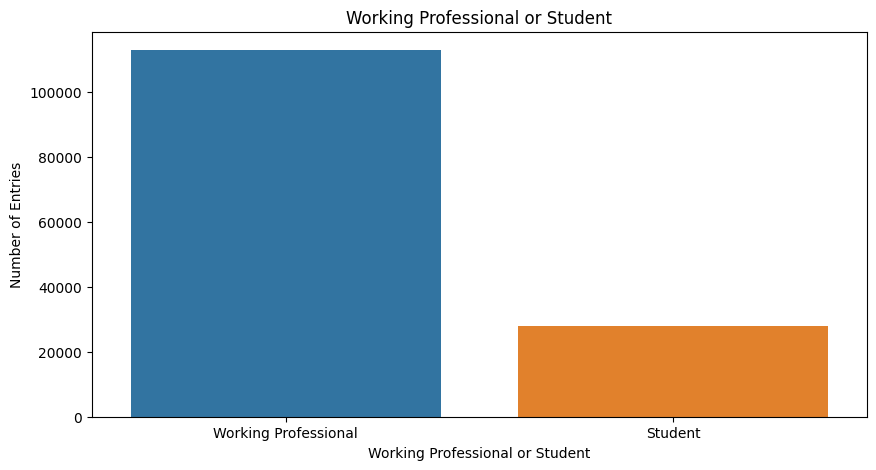

In [6]:
plt.figure(figsize=(10, 5))
uni_count = df_train['Working Professional or Student'].value_counts()
sns.barplot(x=uni_count.index, y=uni_count.values)
plt.ylabel(f"Number of Entries")
# plt.xlabel(f"")
plt.title(f"Working Professional or Student")
plt.show()

We can see that there are more than 11000 persons are **Working Professional**, and they do not need to worry about ***Academic Pressure***, ***CGPA*** and ***Study Satisfaction***. In contrast, **Students** do not care ***Work Pressure*** and ***Job Satisfaction***. 

At the end of this section, we can also make a barplot to the ***Depression*** column.

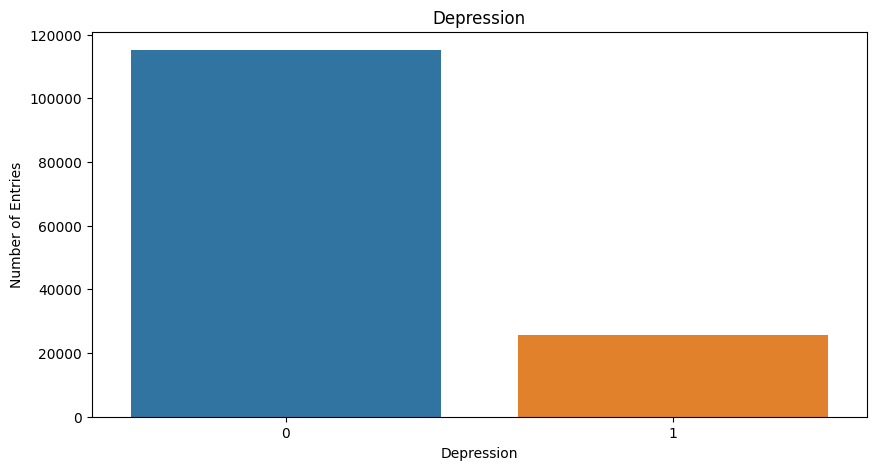

In [7]:
plt.figure(figsize=(10, 5))
uni_count = df_train['Depression'].value_counts()
sns.barplot(x=uni_count.index, y=uni_count.values)
plt.ylabel(f"Number of Entries")
# plt.xlabel(f"")
plt.title(f"Depression")
plt.show()

# 2. Data Cleaning

First of all, let us deal with the missing values in the dataset.

In [8]:
num_columns = df_train.select_dtypes(include=['float64','int64']).columns
cat_columns = df_train.select_dtypes(include='object').columns

# 2.1 Numeric Columns

In [9]:
df_train[num_columns].isnull().sum()

id                         0
Age                        0
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Work/Study Hours           0
Financial Stress           4
Depression                 0
dtype: int64

We already know that the reason for the missing values in columns ***Academic Pressure***, ***CGPA***, ***Study Satisfaction***, ***Work Pressure*** and ***Job Satisfaction***. We can just filled the missing values by -1.

In [10]:
def fillna_num(df):
    columns = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']
    for column in columns:
        df[column] = df[column].fillna(-1)
    return df

In [11]:
df_train = fillna_num(df_train)
df_test = fillna_num(df_test)

Now we look into the ***Financial Stress*** column. 

In [12]:
df_train['Financial Stress'].value_counts()

Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

For simplicity, we can just fill a median (3.0) to the missing values.

In [13]:
df_train['Financial Stress'] = df_train['Financial Stress'].fillna(float(df_train['Financial Stress'].median()))
df_test['Financial Stress'] = df_test['Financial Stress'].fillna(float(df_test['Financial Stress'].median()))

Final check to the numeric columns:

In [14]:
df_train[num_columns].isnull().sum()

id                    0
Age                   0
Academic Pressure     0
Work Pressure         0
CGPA                  0
Study Satisfaction    0
Job Satisfaction      0
Work/Study Hours      0
Financial Stress      0
Depression            0
dtype: int64

We make some histograms for the numeric columns:

In [15]:
df_train[num_columns].describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,70349.500000,40.388621,-0.178699,2.205508,0.716835,-0.217825,2.186020,6.252679,2.988984,0.181713
std,40616.735775,12.384099,1.762205,2.031656,3.513295,1.685430,2.029611,3.853615,1.413613,0.385609
min,0.000000,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,-1.000000,4.000000,-1.000000,-1.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [16]:
def make_hist(df):
    num_columns = df.select_dtypes(include='float64').columns
    for column in num_columns:
        pvalue = df[df['Depression']== 0][column].to_numpy()
        evalue = df[df['Depression']== 1][column].to_numpy()
        fig, ax = plt.subplots(figsize=(10,5))
        plot_range = [0,10]
        if column == 'Age':
            plot_range = [0,60]
        ax.hist(pvalue, bins=10, range=plot_range, density=True, label='0')
        ax.hist(evalue, bins=10, range=plot_range, density=True, label='1')
        ax.legend()
        ax.set_xlabel(f'{column}')
        ax.set_ylabel('Fraction of data')
        plt.show()

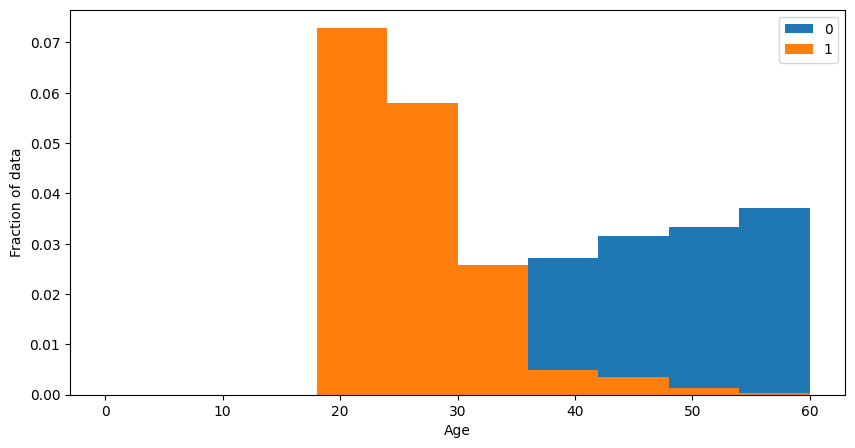

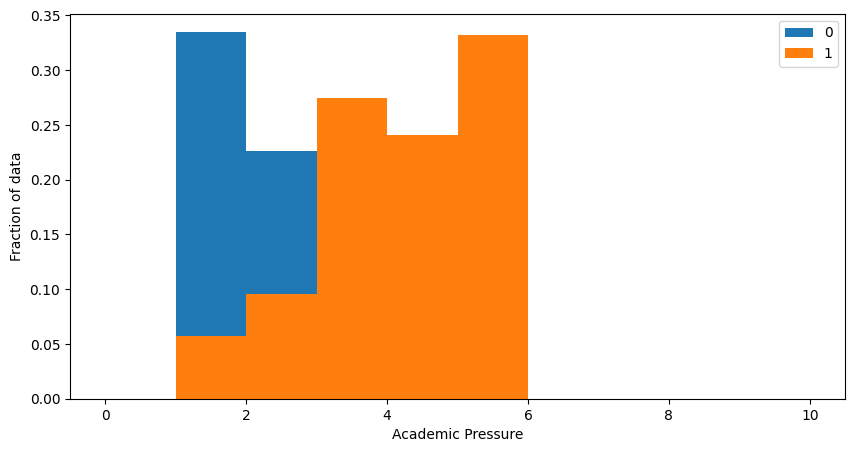

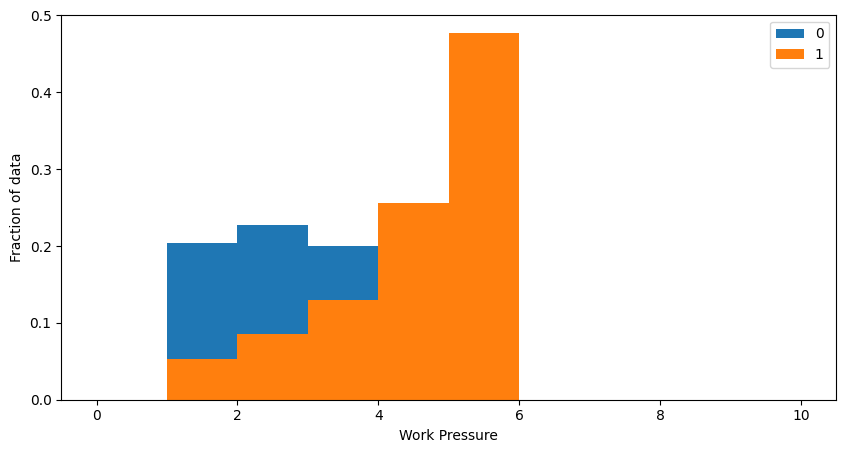

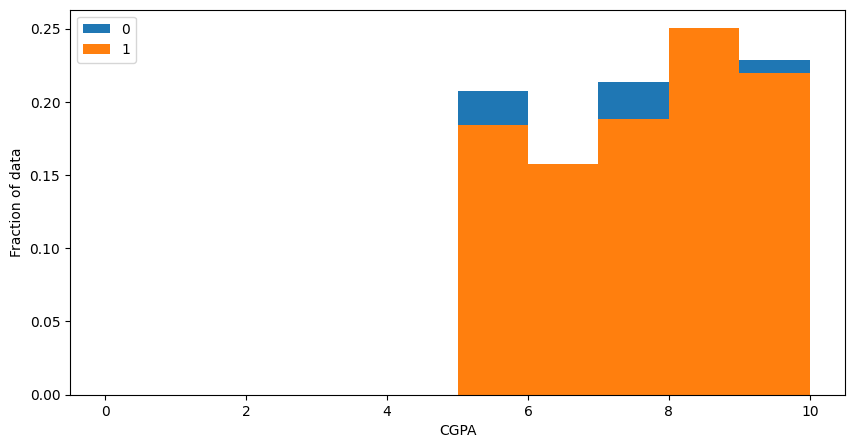

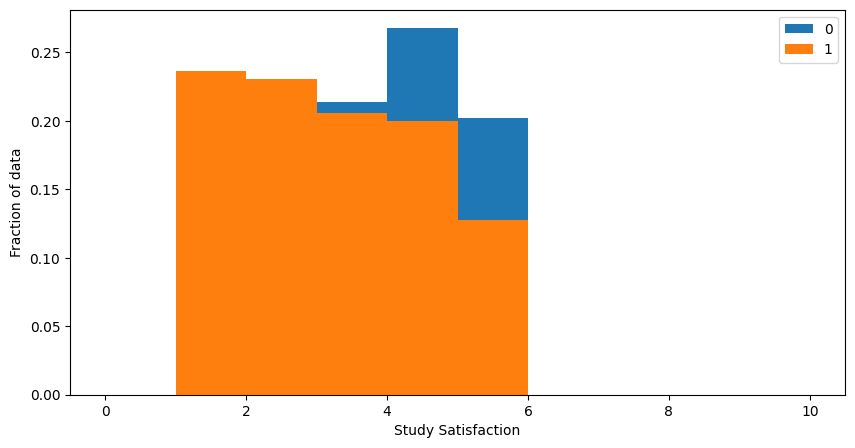

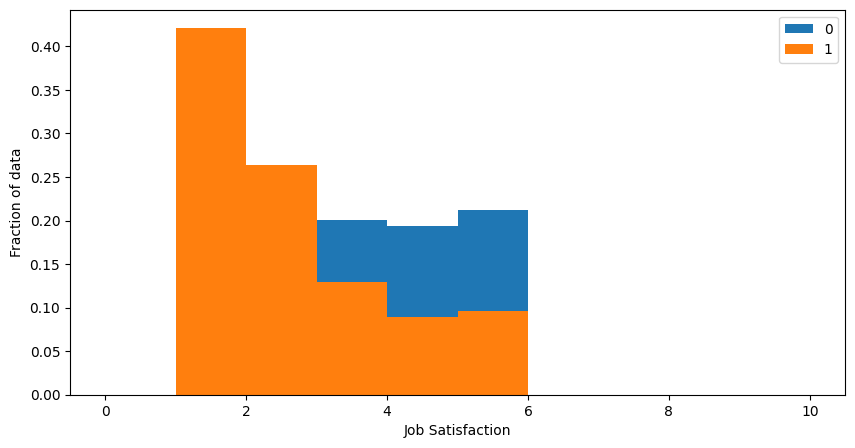

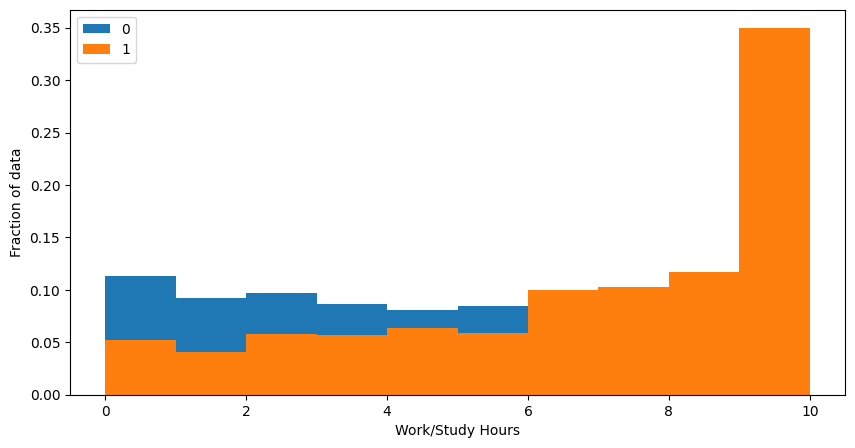

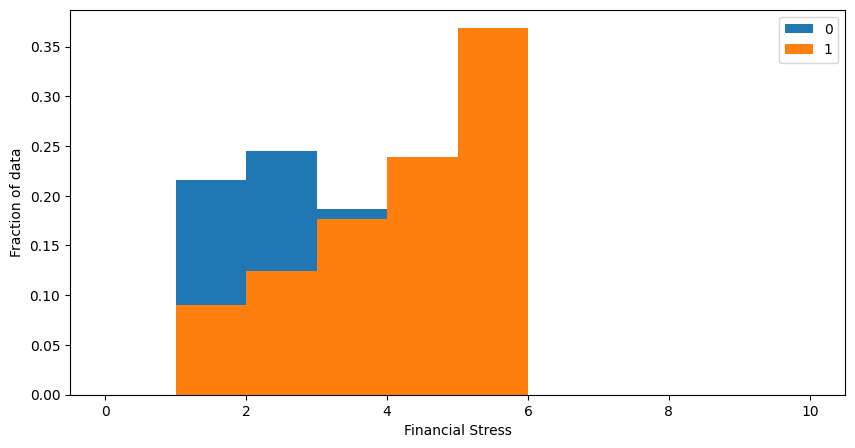

In [17]:
make_hist(df_train)

We can see that these features are important, except the ***CGPA***.

# 2.2 Catagorical Columns

We can switch to the catagorical columns now.

In [18]:
df_train[cat_columns].isnull().sum()

Name                                         0
Gender                                       0
City                                         0
Working Professional or Student              0
Profession                               36630
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Family History of Mental Illness             0
dtype: int64

In [19]:
sub_cat_columns = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in sub_cat_columns:
    print('=============================')
    print(df_train[column].value_counts())

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
Moderate              1
Analyst               1
Pranav                1
Visakhapatnam         1
Yuvraj                1
Name: count, Length: 64, dtype: int64
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours             

In this case, we can fill missing values by **'other'**.

In [20]:
def fillna_cat(df):
    columns = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']
    for column in columns:
        df[column].fillna('other', inplace=True)
    return df

In [21]:
df_train = fillna_cat(df_train)
df_test = fillna_cat(df_test)

/tmp/ipykernel_30/3782502397.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('other', inplace=True)


We also see some weird values in these catagorical columns, but they do not appear frequently. We can replace less frequent values to **other**, too.

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      140700 non-null  float64
 8   Work Pressure                          140700 non-null  float64
 9   CGPA                                   140700 non-null  float64
 10  Study Satisfaction                     140700 non-null  

In [23]:
def fill_less_frequent_value(df):
    columns = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']
    for column in columns:
        count = df[column].value_counts()
        less_freq = count[count<20].index
        df[column] = df[column].apply(lambda x: 'other' if x in less_freq else x)
    return df

In [24]:
df_train = fill_less_frequent_value(df_train)
df_test = fill_less_frequent_value(df_test)

Check everything again:

In [25]:
df_train[cat_columns].isnull().sum()

Name                                     0
Gender                                   0
City                                     0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
dtype: int64

In [26]:
sub_cat_columns = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for column in sub_cat_columns:
    print('=============================')
    print(df_train[column].value_counts())

Profession
other                     36680
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 13

At the end of this section, we make some plots for these columns:

In [27]:
def make_barplot(df):
    columns = ['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
    for column in columns:
        plt.figure(figsize=(10, 5))
        uni_count = df[column].value_counts()
        sns.barplot(x=uni_count.index, y=uni_count.values)
        plt.ylabel(f"Count of '{column}'")
        plt.xlabel(f"{column}")
        plt.title(f"Count of unique categories in column '{column}'")
        plt.show()

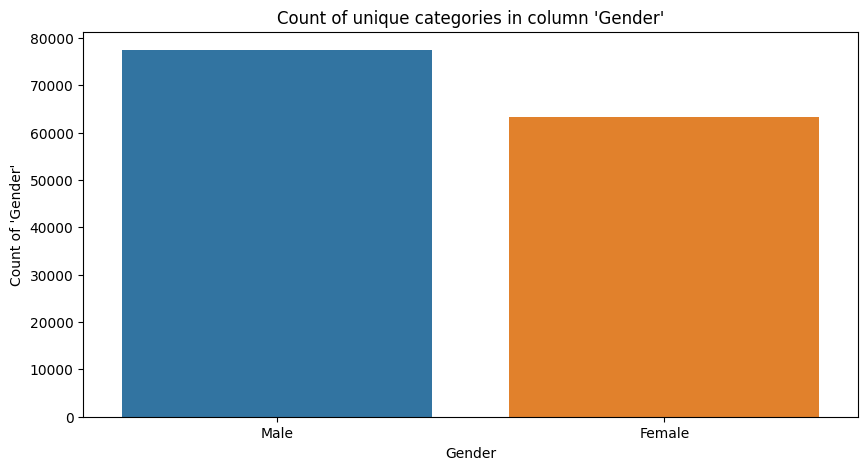

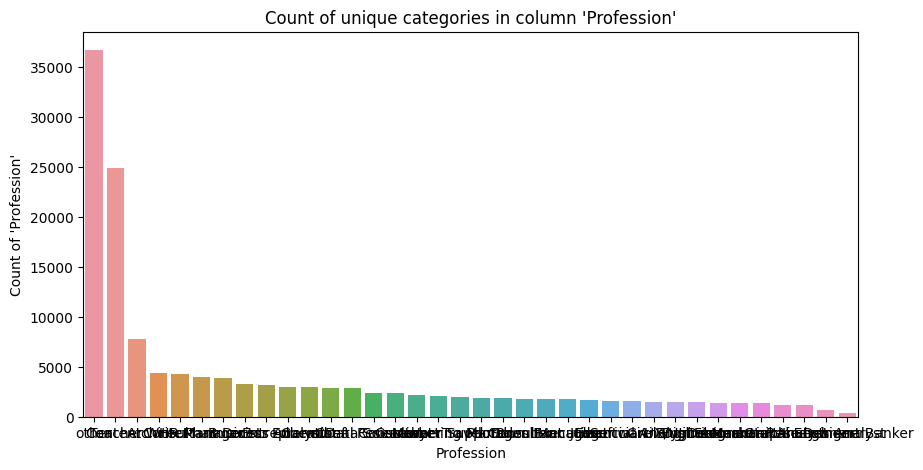

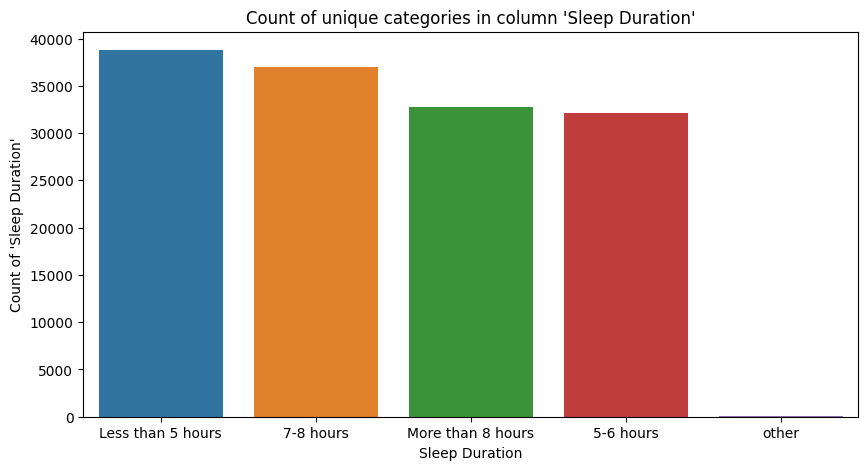

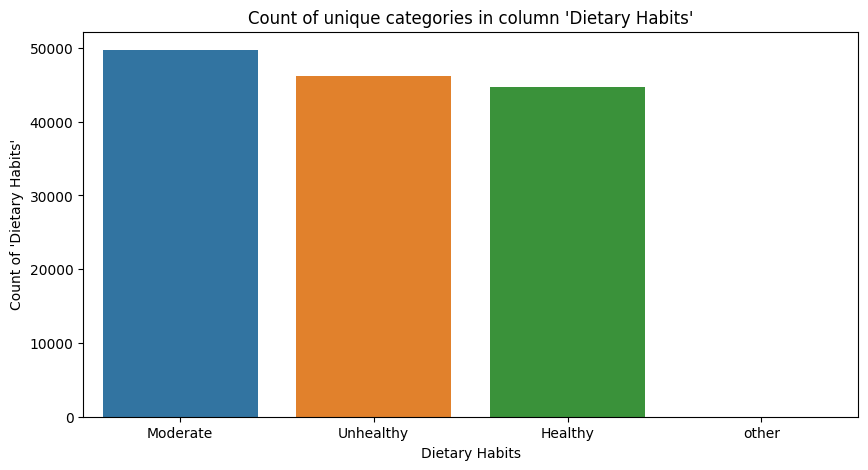

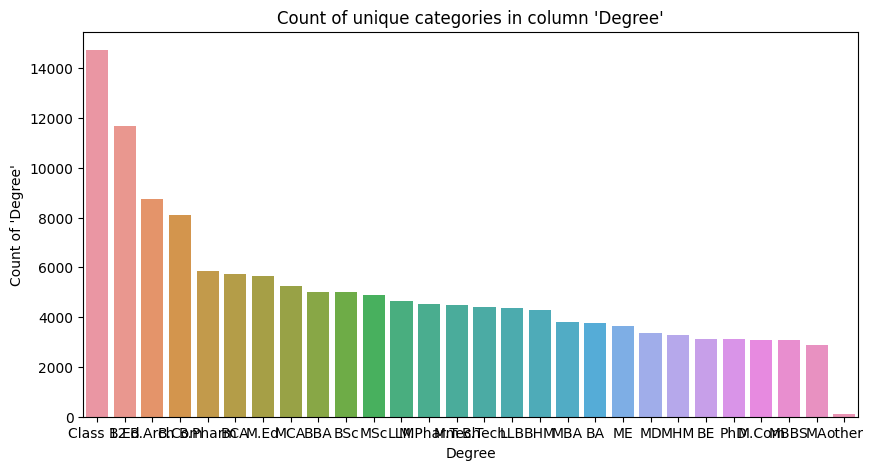

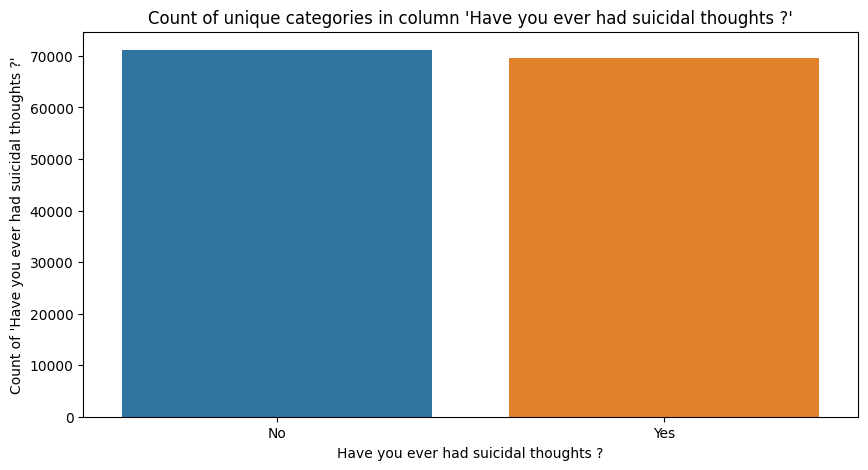

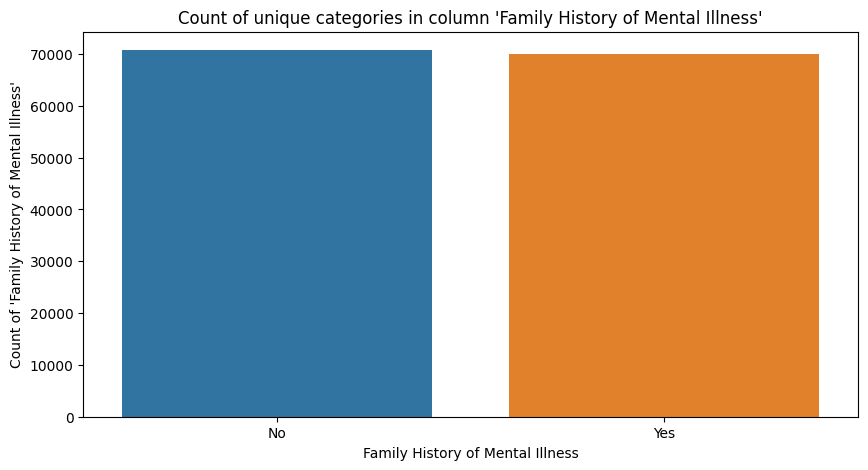

In [28]:
make_barplot(df_train)

# 3. Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder

def encoding(df):
    cat_columns = df.select_dtypes(include='object').columns
    
    encoder = OrdinalEncoder()
    df[cat_columns] = encoder.fit_transform(df[cat_columns].astype(str))
    
    return df

In [30]:
df_train = encoding(df_train)
df_test = encoding(df_test)

We may want to see the Correlation Matrix.

In [31]:
corr=df_train.corr()['Depression']
corr[np.argsort(corr,axis=0)[::-1]]

/tmp/ipykernel_30/1070387100.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr[np.argsort(corr,axis=0)[::-1]]


Depression                               1.000000
Academic Pressure                        0.582396
CGPA                                     0.514080
Study Satisfaction                       0.451629
Have you ever had suicidal thoughts ?    0.349066
Profession                               0.322456
Financial Stress                         0.227232
Work/Study Hours                         0.191746
Dietary Habits                           0.148949
Family History of Mental Illness         0.016502
Gender                                   0.008144
id                                       0.003944
Sleep Duration                          -0.004259
City                                    -0.020915
Degree                                  -0.023707
Name                                    -0.028897
Work Pressure                           -0.323561
Job Satisfaction                        -0.473709
Working Professional or Student         -0.520790
Age                                     -0.564671


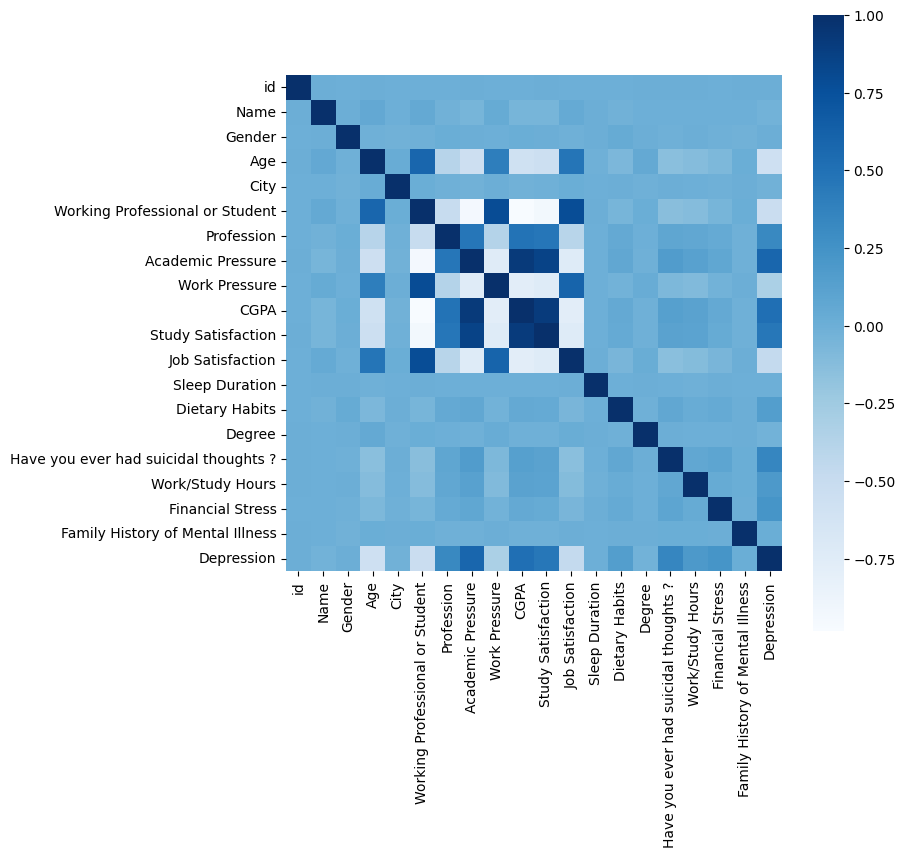

In [32]:
features_correlation = df_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Obviously, the ***Academic Pressure***, ***CGPA*** and ***Study Satisfaction*** are correlated. ***Work Pressure*** is correlated to ***Job Satisfaction***.

# 4. CatBoost Model and Fine Tuning

We drop ***id***, ***Name*** and ***City***. They should not affect the results.

In [33]:
X = df_train.drop(['id', 'Name', 'City', 'Depression'], axis=1)
X_test = df_test.drop(['id', 'Name', 'City'], axis=1)
y = df_train['Depression']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1
)

In [35]:
import optuna
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    cat_params = dict(
        #iterations = trial.suggest_int("iterations", 100, 1000),
        #iterations = 1000,
        learning_rate = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth = trial.suggest_int("depth", 4, 10),
        l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bagging_temperature = trial.suggest_uniform('bagging_temperature', 0, 1),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        task_type='GPU',
        early_stopping_rounds=200,
        verbose=False
    )
    
    model = CatBoostClassifier(**cat_params)
    X_train_pool = Pool(X_train, y_train)
    X_valid_pool = Pool(X_val, y_val)
    model.fit(X=X_train_pool, eval_set=X_valid_pool)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    return score

In [36]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
catboost_params = study.best_params

[I 2024-11-03 00:43:05,298] A new study created in memory with name: no-name-8aefb755-b89e-4d1a-9c4a-083418276e2c
/tmp/ipykernel_30/3434364687.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_temperature = trial.suggest_uniform('bagging_temperature', 0, 1),
[I 2024-11-03 00:43:22,999] Trial 0 finished with value: 0.939410092395167 and parameters: {'learning_rate': 0.005881873798252495, 'depth': 9, 'l2_leaf_reg': 1.0754196590929197, 'bagging_temperature': 0.7684099835546656, 'random_strength': 0.34369257220162097}. Best is trial 0 with value: 0.939410092395167.
/tmp/ipykernel_30/3434364687.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  bagging_temperature = trial.suggest_uniform('bagging_

In [37]:
catboost_params

{'learning_rate': 0.0383447294477305,
 'depth': 4,
 'l2_leaf_reg': 0.000177236244927708,
 'bagging_temperature': 0.03805530103941712,
 'random_strength': 4.818788402165575e-07}

In [38]:
best_model = CatBoostClassifier(**catboost_params)
X_train_pool = Pool(X_train, y_train)
X_valid_pool = Pool(X_val, y_val)
best_model.fit(X=X_train_pool, eval_set=X_valid_pool)

0:	learn: 0.6303571	test: 0.6301931	best: 0.6301931 (0)	total: 37.9ms	remaining: 37.9s
1:	learn: 0.5765551	test: 0.5763672	best: 0.5763672 (1)	total: 70.9ms	remaining: 35.4s
2:	learn: 0.5290970	test: 0.5287151	best: 0.5287151 (2)	total: 104ms	remaining: 34.4s
3:	learn: 0.4888119	test: 0.4883164	best: 0.4883164 (3)	total: 135ms	remaining: 33.7s
4:	learn: 0.4537604	test: 0.4532243	best: 0.4532243 (4)	total: 159ms	remaining: 31.7s
5:	learn: 0.4231287	test: 0.4224691	best: 0.4224691 (5)	total: 178ms	remaining: 29.5s
6:	learn: 0.3979765	test: 0.3971016	best: 0.3971016 (6)	total: 196ms	remaining: 27.9s
7:	learn: 0.3766050	test: 0.3756651	best: 0.3756651 (7)	total: 215ms	remaining: 26.7s
8:	learn: 0.3567990	test: 0.3556836	best: 0.3556836 (8)	total: 234ms	remaining: 25.7s
9:	learn: 0.3392979	test: 0.3380329	best: 0.3380329 (9)	total: 254ms	remaining: 25.2s
10:	learn: 0.3242810	test: 0.3228835	best: 0.3228835 (10)	total: 272ms	remaining: 24.5s
11:	learn: 0.3111611	test: 0.3096440	best: 0.30964

# 5. Prediction

In [39]:
results = best_model.predict(X_test)
submission = pd.read_csv("/kaggle/input/playground-series-s4e11/sample_submission.csv")
submission['Depression'] = results
submission.to_csv('submission.csv', index=False)

In [40]:
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
